IndentationError: unindent does not match any outer indentation level (<tokenize>, line 165)

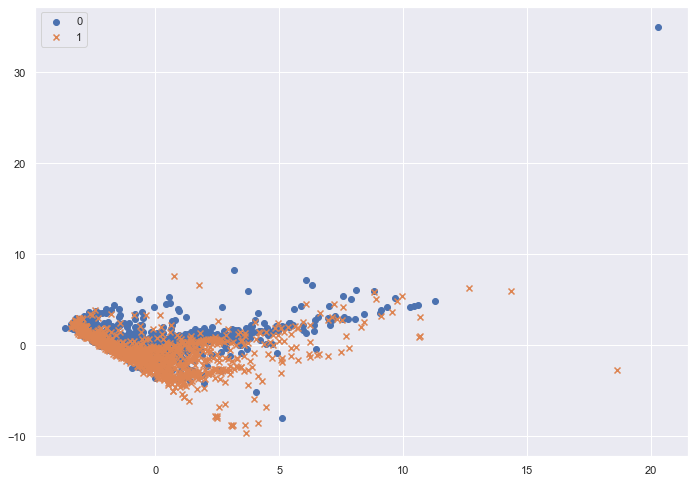

0.4695736163171146


In [2]:
X = data.copy()
#del X["default.payment.next.month"]
X.rename(columns={"default.payment.next.month": "default"},inplace = True)

df2 = X[X.default == 0].sample(n = 1000)
df3 = X[X.default == 1].sample(n = 1000)
df4 = pd.concat([df2, df3], axis = 0)
y = df4["default"].copy()
del df4["default"]

X = stdscaler(df4)
pca =PCA(n_components=2).fit(X)
pca_data = pd.DataFrame(pca.transform(X),index = X.index,columns =["v1","v2"])   
pca_data['default']= y
x0= pca_data[pca_data.default == 0].copy()
x1 =pca_data[pca_data.default == 1].copy()
plt.figure(figsize=(11.7,8.27))
plt.scatter(x0.v1,x0.v2,label='0')
plt.scatter(x1.v1,x1.v2,label='1',marker ='x')
plt.legend()
plt.show()
print(np.sum(pca.explained_variance_ratio_))


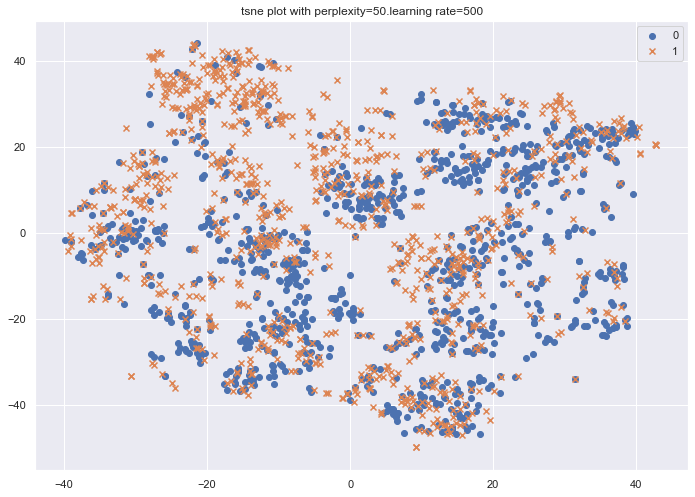

In [4]:
from sklearn.manifold import TSNE
u = [5,10,30,50,100]
learnrate = [10,50,100,200,500]
pcadot9 =PCA(n_components=.99).fit_transform(X)
u = [50]
learnrate = [500]
for lr in learnrate:
    for per in u:
        X_tsne = TSNE(n_components=2,perplexity=per,learning_rate =lr ).fit_transform(pcadot9)
        X_tsne=pd.DataFrame(X_tsne,index = X.index,columns =["v1","v2"]) 
        X_tsne['default']=y
        x0= X_tsne[X_tsne.default == 0].copy()#.sample(1000)
        x1 =X_tsne[X_tsne.default == 1].copy()#.sample(1000)
        plt.figure(figsize=(11.7,8.27))
        plt.scatter(x0.v1,x0.v2,label='0')
        plt.scatter(x1.v1,x1.v2,label='1',marker ='x')
        plt.title('tsne plot with perplexity={}.learning rate={}'.format(str(per),str(lr)))
        plt.legend()
        plt.show()

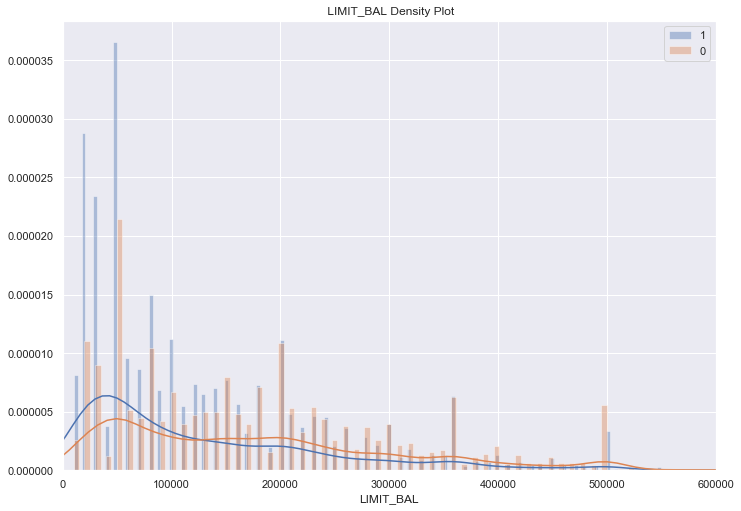

In [5]:
data_df =data.copy()

class_0 = data_df.loc[data_df['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = data_df.loc[data_df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize=(11.7,8.27))
plt.title(' LIMIT_BAL Density Plot')

sns.distplot(class_1,kde=True,bins=200,label ='1' )
sns.distplot(class_0,kde=True,bins=200,label ='0' )
plt.legend()
plt.xlim(0,600000)
plt.show()